In [1]:
# Homework 3 ORDER BATCHING PROBLEM

from docplex.mp.model import Model
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from tabulate import tabulate

![Screenshot 2023-12-11 alle 14.48.53.png](<attachment:Screenshot 2023-12-11 alle 14.48.53.png>)
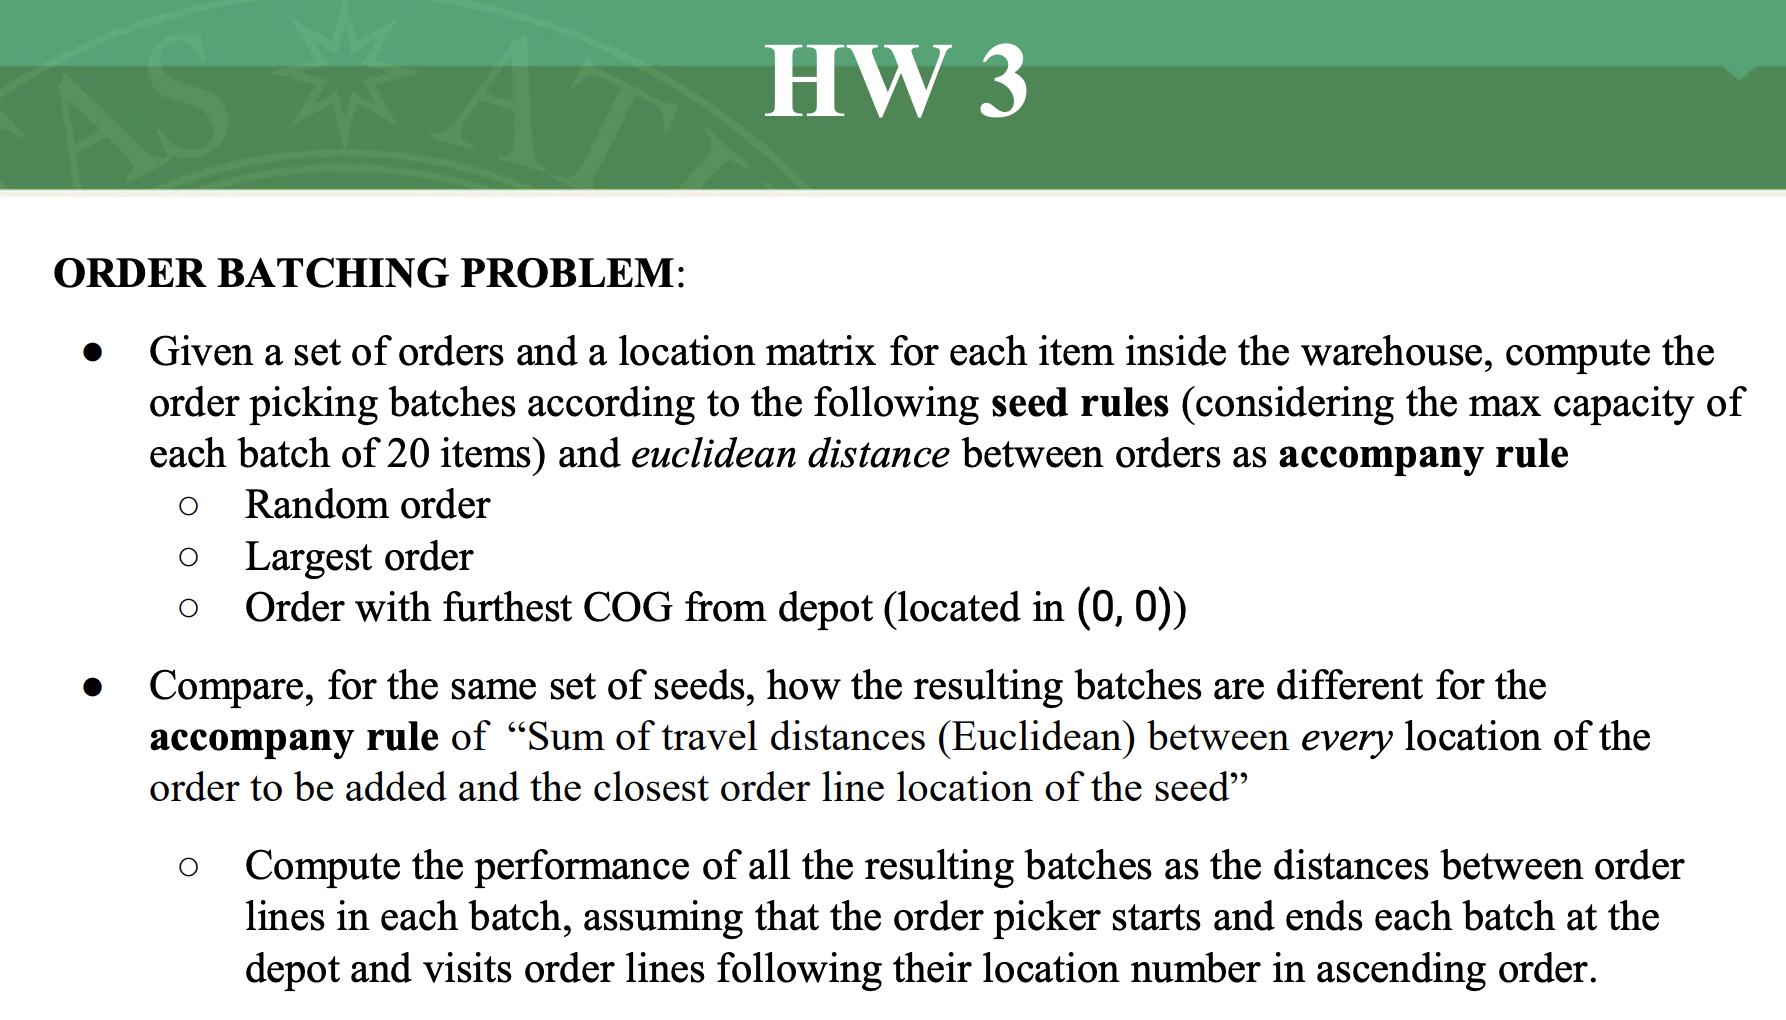

In [2]:
#list of list(orders)

wh_coords = pd.read_csv("./wh_coords.csv")

lines = open('./orders.csv', 'r').readlines()
orders = [list(map(float, line.strip().split(','))) for line in lines]

X = wh_coords['x'].values 
Y = wh_coords['y'].values 

#max_cap = len(orders)
max_cap = 20

print(orders)

[[307.0, 304.0, 45.0, 26.0, 218.0, 344.0], [291.0, 234.0, 40.0], [341.0, 39.0], [173.0, 187.0, 347.0, 279.0], [77.0, 53.0, 223.0, 68.0], [264.0, 19.0, 314.0, 290.0, 34.0], [303.0, 89.0], [144.0, 333.0, 70.0, 337.0], [66.0, 303.0], [225.0, 104.0], [83.0, 45.0], [298.0], [332.0], [22.0, 4.0], [171.0, 298.0]]


In [3]:
def COG(order):
    x = 0
    y = 0
    for line in order:
        index = int(line) - 1  # Convert float to integer and adjust for zero-based indexing
        x += X[index]
        y += Y[index]
    return [x / len(order), y / len(order)]

def euclid_dist(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def calculate_distance_between_points(point1, point2):
    # Assuming points are in the format [x, y]
    return np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def calculate_batch_distance(batch, wh_coords):
    total_distance = 0.0
    depot = [0.0, 0.0]  # Depot coordinates
    
    l = []
    
    for order in batch:
        for i in range(len(order)):
            l.append(order[i]) 
        # Sort order in ascending order
        sorted_order = sorted(l, key=lambda x: int(x))
        
        current_location = depot  # Start from the depot
    for line in sorted_order:
        index = int(line) - 1  # Convert float to integer and adjust for zero-based indexing
        order_location = [wh_coords.iloc[index]['x'], wh_coords.iloc[index]['y']]
        total_distance += calculate_distance_between_points(current_location, order_location)
        current_location = order_location
    
    # Return to the depot after completing the batch
    total_distance += calculate_distance_between_points(current_location, depot)
    return total_distance

In [4]:
simil_matr = np.zeros([len(orders),len(orders)])

for i in range(len(orders)):
    xi,yi = COG(orders[i])
    for j in range(len(orders)):
        if i != j:
            xj,yj = COG(orders[j])
            simil_matr[i,j] = euclid_dist(xi,yi,xj,yj)
        
print(simil_matr)

[[ 0.         18.15060452  8.24621125  5.          8.5        12.72006289
   5.          6.32455532  1.41421356 15.03329638  1.         12.36931688
  27.29468813 24.18677324 19.23538406]
 [18.15060452  0.         10.00555401 13.20774184 10.63145229 16.28632692
  22.01009869 12.00462874 19.29018173 22.83515808 18.30604029  8.02772972
  12.23837317 24.09241467  5.42627353]
 [ 8.24621125 10.00555401  0.          3.60555128  2.06155281 12.20655562
  12.04159458  2.          9.48683298 15.8113883   8.54400375  6.40312424
  19.41648784 23.34523506 12.08304597]
 [ 5.         13.20774184  3.60555128  0.          4.71699057 10.52615789
   9.48683298  2.23606798  6.08276253 16.15549442  5.09901951  7.61577311
  23.02172887 22.13594362 14.31782106]
 [ 8.5        10.63145229  2.06155281  4.71699057  0.         14.20035211
  11.54339638  2.5         9.86154146 13.90143877  9.01387819  8.32165849
  18.79494613 25.40177159 13.46291202]
 [12.72006289 16.28632692 12.20655562 10.52615789 14.20035211  0.

In [5]:
# Accompany rule 1 - Euclidean distance  
# Seed rule 1 - Random order

# Create the batches
np.random.seed(0)

rndm = np.random.randint(0,len(orders))

batches = [[orders[rndm]]]
capacity = len(orders[rndm])

def most_similar(i, indexces):   # i is the last oder added to the batch
    min_sim = np.inf   # Start assigning a huge value for the mean similarity
    J_sim = -1  
    for j in indexces:
        simil = simil_matr[i,j]
        if simil < min_sim:
            min_sim = simil
            J_sim = j
    return J_sim

i = rndm 
to_add = list(range(len(orders)))
to_add.remove(i)

k = 0
while to_add !=[]:
    j = most_similar(i,to_add)
    if capacity + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        capacity += len(orders[j])
        i = j # Now j is the last order added to the batches
    else:
        k += 1
        batches.append([orders[j]])
        capacity = len(orders[j])
        to_add.remove(j)
        i = j


for n, batch in enumerate(batches):
    print(f'Batch{n+1}:{batch}')

tot_performance1 = 0
# Calculate performance for each batch
for i, batch in enumerate(batches):
    performance = calculate_batch_distance(batch, wh_coords)
    print(f"Batch {i + 1} Performance: {performance}")
    tot_performance1 += performance

print(f"Total Performance: {tot_performance1}")

list_perf = {'Accompany Rule':'Euclidean distance','Seed rule':'Random order','Total Performance':tot_performance1}
print(list_perf)

Batch1:[[332.0], [291.0, 234.0, 40.0], [171.0, 298.0], [298.0], [341.0, 39.0], [144.0, 333.0, 70.0, 337.0], [173.0, 187.0, 347.0, 279.0]]
Batch2:[[77.0, 53.0, 223.0, 68.0], [307.0, 304.0, 45.0, 26.0, 218.0, 344.0], [83.0, 45.0], [66.0, 303.0], [303.0, 89.0], [225.0, 104.0]]
Batch3:[[264.0, 19.0, 314.0, 290.0, 34.0], [22.0, 4.0]]
Batch 1 Performance: 334.5164221806609
Batch 2 Performance: 275.9787249056885
Batch 3 Performance: 147.2812553745038
Total Performance: 757.7764024608532
{'Accompany Rule': 'Euclidean distance', 'Seed rule': 'Random order', 'Total Performance': 757.7764024608532}


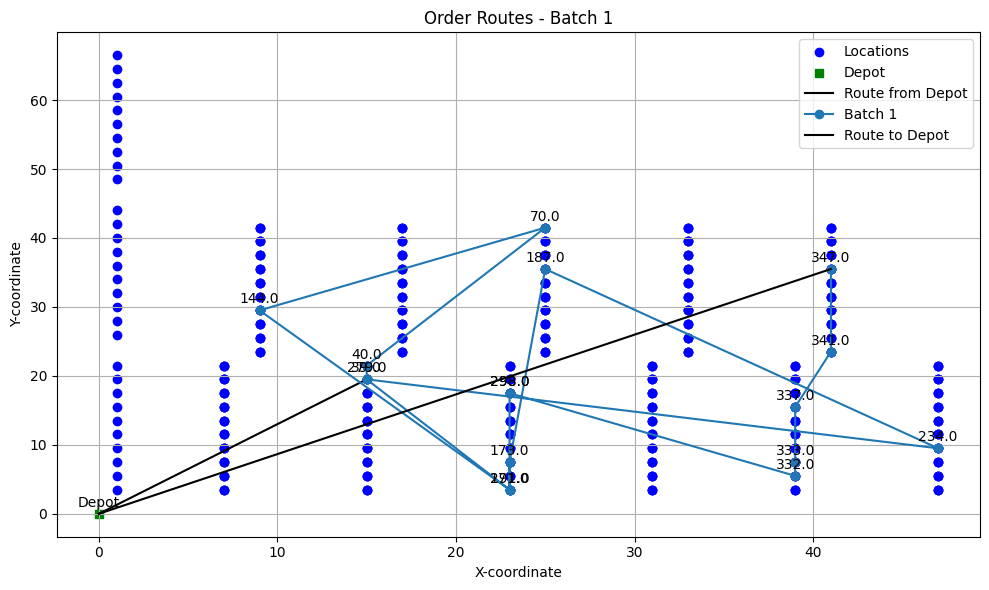

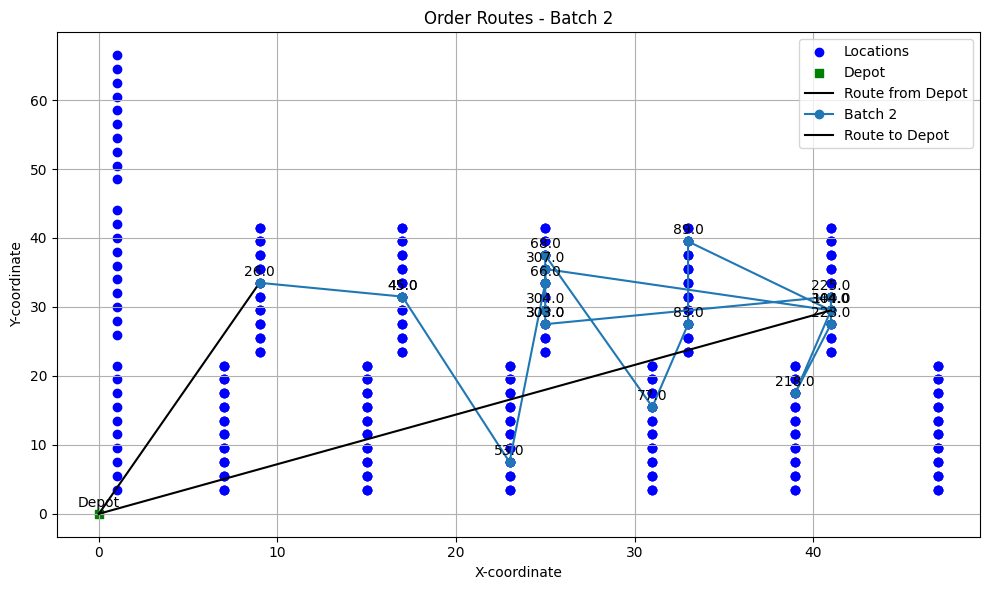

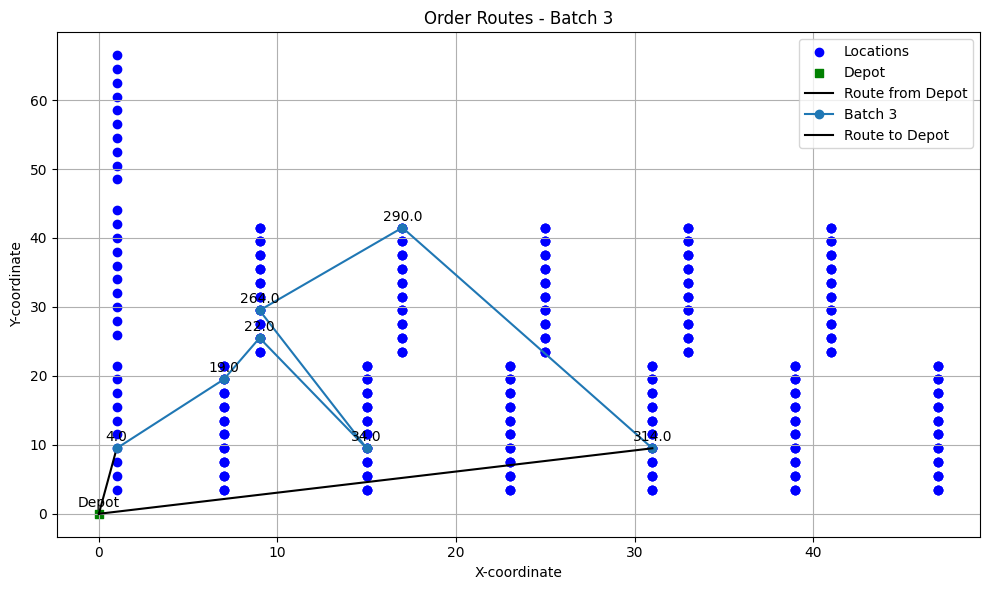

In [6]:
# Plot
def plot_orders_and_route(batches, wh_coords, depot=[0.0, 0.0]):
    for idx, batch in enumerate(batches):
        plt.figure(figsize=(10, 6))

        # Plot warehouse locations
        plt.scatter(wh_coords['x'], wh_coords['y'], marker='o', color='blue', label='Locations')
        plt.scatter(depot[0], depot[1], marker='s', color='green', label='Depot')

        all_points = [point for order in batch for point in order]
        all_points = sorted(all_points)

        # Connect the depot to the first point of the first order
        first_order_location = np.array([[wh_coords.iloc[int(line) - 1]['x'], wh_coords.iloc[int(line) - 1]['y']] for line in [all_points[0]]])
        plt.plot([depot[0], first_order_location[0, 0]], [depot[1], first_order_location[0, 1]], linestyle='-', color='black', label='Route from Depot')

        # Connect all points in ascending order
        order_location = np.array([[wh_coords.iloc[int(line) - 1]['x'], wh_coords.iloc[int(line) - 1]['y']] for line in all_points])
        plt.plot(order_location[:, 0], order_location[:, 1], marker='o', linestyle='-', label=f'Batch {idx + 1}')

        # Annotate order locations
        for i, txt in enumerate(all_points):
            plt.annotate(txt, (order_location[i, 0], order_location[i, 1]), textcoords="offset points", xytext=(0, 5), ha='center')

        # Connect the last point of the last order to the depot
        last_order_location = np.array([[wh_coords.iloc[int(line) - 1]['x'], wh_coords.iloc[int(line) - 1]['y']] for line in [all_points[-1]]])
        plt.plot(last_order_location[:, 0], last_order_location[:, 1], linestyle='-', color='black', label='Route to Depot')
        plt.plot([last_order_location[-1, 0], depot[0]], [last_order_location[-1, 1], depot[1]], linestyle='-', color='black')

        # Annotate depot
        plt.annotate('Depot', (depot[0], depot[1]), textcoords="offset points", xytext=(0, 5), ha='center')

        plt.xlabel('X-coordinate')
        plt.ylabel('Y-coordinate')
        plt.title(f'Order Routes - Batch {idx + 1}')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# Visualize each batch
plot_orders_and_route(batches, wh_coords)



In [7]:
# Accompany rule 1 - Euclidean distance  
# Seed Rule 2 - Largest order

def biggest_order():
    l = []
    dist = []
    for i in range(0,len(orders)):
        l.append(len(orders[i]))
        xi,yi = COG(orders[i])
        dist.append(euclid_dist(0,0,xi,yi))
    return l,dist

l,dist = biggest_order()

max_O = np.max(l)

min = np.inf
j = -1
for i in range(0,len(orders)):
    if l[i] == max_O:
        if(dist[i]<min):
            min = dist[i]
            j = i

# Create the batches
largest = j

batches = [[orders[largest]]]
capacity = len(orders[largest])


def most_similar(i, indexces):   # i is the last oder added to the batch
    min_sim = np.inf   # Start assigning a huge value for the mean similarity
    J_sim = -1  
    for j in range(len(orders)):
        simil = simil_matr[i,j]
        if simil < min_sim and i!=j and j in indexces:
            min_sim = simil
            J_sim = j
    return J_sim

i = largest 
to_add = list(range(len(orders)))
to_add.remove(i)


k = 0
while to_add !=[]:
    j = most_similar(i,to_add)
    if capacity + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        capacity += len(orders[j])
        i = j # Now j is the last order added to the batches
    else:
        k += 1
        batches.append([orders[j]])
        capacity = len(orders[j])
        to_add.remove(j)
        i = j

for n, batch in enumerate(batches):
    print(f'Batch {n+1}: {batch}')

tot_performance2 = 0
# Calculate performance for each batch
for i, batch in enumerate(batches):
    performance = calculate_batch_distance(batch, wh_coords)
    print(f"Batch {i + 1} Performance: {performance}")
    tot_performance2 += performance

print(f"Total Performance: {tot_performance2}")

list_perf = {'Accompany Rule':'Euclidean distance','Seed rule':'Largest order','Total Performance':tot_performance2}
print(list_perf)

Batch 1: [[307.0, 304.0, 45.0, 26.0, 218.0, 344.0], [83.0, 45.0], [66.0, 303.0], [303.0, 89.0], [173.0, 187.0, 347.0, 279.0], [144.0, 333.0, 70.0, 337.0]]
Batch 2: [[341.0, 39.0], [77.0, 53.0, 223.0, 68.0], [298.0], [171.0, 298.0], [291.0, 234.0, 40.0], [332.0], [225.0, 104.0], [264.0, 19.0, 314.0, 290.0, 34.0]]
Batch 3: [[22.0, 4.0]]
Batch 1 Performance: 348.8263052582885
Batch 2 Performance: 415.61096981295043
Batch 3 Performance: 54.48266497324964
Total Performance: 818.9199400444885
{'Accompany Rule': 'Euclidean distance', 'Seed rule': 'Largest order', 'Total Performance': 818.9199400444885}


In [8]:
# Accompany rule 1 - Euclidean distance  
# Seed Rule 3 - Order with furthest COG from depot (0,0)

def furthest_COG():
    l = []
    dist = []
    for i in range(0,len(orders)):
        l.append(len(orders[i]))
        xi,yi = COG(orders[i])
        dist.append(euclid_dist(0,0,xi,yi))
    return l,dist

l,dist = furthest_COG()

max_O = np.max(l)

min = 0
j = -1
for i in range(0,len(orders)):
    if(dist[i]>min):
            min = dist[i]
            j = i

# Create the batches
furthest = j

batches = [[orders[furthest]]]
capacity = len(orders[furthest])

def most_similar(i, indexces):   # i is the last oder added to the batch
    min_sim = np.inf   # Start assigning a huge value for the mean similarity
    J_sim = -1  
    for j in range(len(orders)):
        simil = simil_matr[i,j]
        if simil < min_sim and i!=j and j in indexces:
            min_sim = simil
            J_sim = j
    return J_sim

i = furthest 
to_add = list(range(len(orders)))
to_add.remove(i)


k = 0
while to_add !=[]:
    j = most_similar(i,to_add)
    if capacity + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        capacity += len(orders[j])
        i = j # Now j is the last order added to the batches
    else:
        k += 1
        batches.append([orders[j]])
        capacity = len(orders[j])
        to_add.remove(j)
        i = j

for n, batch in enumerate(batches):
    print(f'Batch {n+1}: {batch}')

tot_performance3 = 0
# Calculate performance for each batch
for i, batch in enumerate(batches):
    performance = calculate_batch_distance(batch, wh_coords)
    print(f"Batch {i + 1} Performance: {performance}")
    tot_performance3 += performance

print(f"Total Performance: {tot_performance3}")

list_perf = {'Accompany Rule':'Euclidean distance','Seed rule':'Order with furthest COG from depot (0,0)','Total Performance':tot_performance3}
print(list_perf)

Batch 1: [[225.0, 104.0], [303.0, 89.0], [307.0, 304.0, 45.0, 26.0, 218.0, 344.0], [83.0, 45.0], [66.0, 303.0], [173.0, 187.0, 347.0, 279.0]]
Batch 2: [[144.0, 333.0, 70.0, 337.0], [341.0, 39.0], [77.0, 53.0, 223.0, 68.0], [298.0], [171.0, 298.0], [291.0, 234.0, 40.0], [332.0]]
Batch 3: [[264.0, 19.0, 314.0, 290.0, 34.0], [22.0, 4.0]]
Batch 1 Performance: 306.19207819745645
Batch 2 Performance: 332.2985068613911
Batch 3 Performance: 147.2812553745038
Total Performance: 785.7718404333513
{'Accompany Rule': 'Euclidean distance', 'Seed rule': 'Order with furthest COG from depot (0,0)', 'Total Performance': 785.7718404333513}


In [9]:
def total_euclidean_distance(seed, order2):
    total_dist = 0
    for loc1 in order2:
        min_dist = float('inf')
        for loc2 in seed:
            loc1 = int(loc1)
            loc2 = int(loc2)
            dist = euclid_dist(X[loc1-1], Y[loc1-1], X[loc2-1], Y[loc2-1])
            if dist < min_dist:
                min_dist = dist
        total_dist += min_dist
    return total_dist


In [10]:
# Accompany rule 2 - Sum of travel distances (Euclidean)
# Seed rule 1 - Random order

# Create the batches
np.random.seed(0)
rndm = np.random.randint(0, len(orders))
seed_order = orders[rndm]

batches = [[seed_order]]
capacity = len(seed_order)


min_val = np.inf  # Rename 'min' to avoid conflicts

i = rndm
to_add = list(range(len(orders)))
to_add.remove(i)

k = 0

def most_close(i, indexces):   # i is the last oder added to the batch
    min_sim = np.inf   # Start assigning a huge value for the mean similarity
    J_sim = -1  
    for j in range(len(orders)):
        simil = total_euclidean_distance(orders[i],orders[j])
        if simil < min_sim and i!=j and j in indexces:
            min_sim = simil
            J_sim = j
    return J_sim


while to_add !=[]:
    j = most_close(i,to_add)
    if capacity + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        capacity += len(orders[j])
        i = j # Now j is the last order added to the batches
    else:
        k += 1
        batches.append([orders[j]])
        capacity = len(orders[j])
        to_add.remove(j)
        i = j

for n, batch in enumerate(batches):
    print(f'Batch {n+1}: {batch}')

tot_performance4 = 0
# Calculate performance for each batch
for i, batch in enumerate(batches):
    performance = calculate_batch_distance(batch, wh_coords)
    print(f"Batch {i + 1} Performance: {performance}")
    tot_performance4 += performance

print(f"Total Performance: {tot_performance4}")

list_perf = {'Accompany Rule':'Sum of travel distances','Seed rule':'Random order','Total Performance':tot_performance4}
print(list_perf)

Batch 1: [[332.0], [298.0], [171.0, 298.0], [66.0, 303.0], [303.0, 89.0], [83.0, 45.0], [225.0, 104.0], [341.0, 39.0], [22.0, 4.0]]
Batch 2: [[264.0, 19.0, 314.0, 290.0, 34.0], [144.0, 333.0, 70.0, 337.0], [291.0, 234.0, 40.0], [173.0, 187.0, 347.0, 279.0], [77.0, 53.0, 223.0, 68.0]]
Batch 3: [[307.0, 304.0, 45.0, 26.0, 218.0, 344.0]]
Batch 1 Performance: 280.5001091226112
Batch 2 Performance: 455.2306708355886
Batch 3 Performance: 161.04791143887078
Total Performance: 896.7786913970706
{'Accompany Rule': 'Sum of travel distances', 'Seed rule': 'Random order', 'Total Performance': 896.7786913970706}


In [11]:
# Accompany rule 2 - Sum of travel distances  
# Seed rule 2 - Largest order

def biggest_order():
    l = []
    dist = []
    for i in range(0,len(orders)):
        l.append(len(orders[i]))
        xi,yi = COG(orders[i])
        dist.append(euclid_dist(0,0,xi,yi))
    return l,dist

l,dist = biggest_order()


max_O = np.max(l)

min = np.inf
j = -1
for i in range(0,len(orders)):
    if l[i] == max_O:
        if(dist[i]<min):
            min = dist[i]
            j = i


# Create the batches
largest = j


batches = [[orders[largest]]]
capacity = len(orders[largest])

i = largest 
to_add = list(range(len(orders)))
to_add.remove(i)

k = 0
def most_close(i, indexces):   # i is the last oder added to the batch
    min_sim = np.inf   # Start assigning a huge value for the mean similarity
    J_sim = -1  
    for j in range(len(orders)):
        simil = total_euclidean_distance(orders[i],orders[j])
        if simil < min_sim and i!=j and j in indexces:
            min_sim = simil
            J_sim = j
    return J_sim


while to_add !=[]:
    j = most_close(i,to_add)
    if capacity + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        capacity += len(orders[j])
        i = j # Now j is the last order added to the batches
    else:
        k += 1
        batches.append([orders[j]])
        capacity = len(orders[j])
        to_add.remove(j)
        i = j

for n, batch in enumerate(batches):
    print(f'Batch {n+1}: {batch}')

tot_performance5 = 0
# Calculate performance for each batch
for i, batch in enumerate(batches):
    performance = calculate_batch_distance(batch, wh_coords)
    print(f"Batch {i + 1} Performance: {performance}")
    tot_performance5 += performance

print(f"Total Performance: {tot_performance5}")

list_perf = {'Accompany Rule':'Sum of travel distances','Seed rule':'Largest order','Total Performance':tot_performance5}
print(list_perf)

Batch 1: [[307.0, 304.0, 45.0, 26.0, 218.0, 344.0], [225.0, 104.0], [298.0], [171.0, 298.0], [332.0], [341.0, 39.0], [83.0, 45.0], [66.0, 303.0], [303.0, 89.0]]
Batch 2: [[22.0, 4.0], [264.0, 19.0, 314.0, 290.0, 34.0], [144.0, 333.0, 70.0, 337.0], [291.0, 234.0, 40.0], [173.0, 187.0, 347.0, 279.0]]
Batch 3: [[77.0, 53.0, 223.0, 68.0]]
Batch 1 Performance: 320.8907375308501
Batch 2 Performance: 402.93902291699203
Batch 3 Performance: 142.0510536493363
Total Performance: 865.8808140971784
{'Accompany Rule': 'Sum of travel distances', 'Seed rule': 'Largest order', 'Total Performance': 865.8808140971784}


In [12]:
# Accompany rule 2 - Sum of travel distances  
# Seed rule 3 - Order with furthest COG from depot (0,0)

def furthest_COG():
    l = []
    dist = []
    for i in range(0,len(orders)):
        l.append(len(orders[i]))
        xi,yi = COG(orders[i])
        dist.append(euclid_dist(0,0,xi,yi))
    return l,dist

l,dist = furthest_COG()


max_O = np.max(l)

min = 0
j = -1
for i in range(0,len(orders)):
    if(dist[i]>min):
            min = dist[i]
            j = i

# Create the batches
largest = j

batches = [[orders[largest]]]
capacity = len(orders[largest])

i = largest 
to_add = list(range(len(orders)))
to_add.remove(i)

def most_close(i, indexces):   # i is the last oder added to the batch
    min_sim = np.inf   # Start assigning a huge value for the mean similarity
    J_sim = -1  
    for j in range(len(orders)):
        simil = total_euclidean_distance(orders[i],orders[j])
        if simil < min_sim and i!=j and j in indexces:
            min_sim = simil
            J_sim = j
    return J_sim

k = 0
while to_add !=[]:
    j = most_close(i,to_add)
    if capacity + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        capacity += len(orders[j])
        i = j # Now j is the last order added to the batches
    else:
        k += 1
        batches.append([orders[j]])
        capacity = len(orders[j])
        to_add.remove(j)
        i = j

for n, batch in enumerate(batches):
    print(f'Batch {n+1}: {batch}')

tot_performance6 = 0
# Calculate performance for each batch
for i, batch in enumerate(batches):
    performance = calculate_batch_distance(batch, wh_coords)
    print(f"Batch {i + 1} Performance: {performance}")
    tot_performance6 += performance

print(f"Total Performance: {tot_performance6}")

list_perf = {'Accompany Rule':'Sum of travel distances','Seed rule':'Order with furthest COG from depot (0,0)','Total Performance':tot_performance6}
print(list_perf)

Batch 1: [[225.0, 104.0], [298.0], [171.0, 298.0], [332.0], [341.0, 39.0], [83.0, 45.0], [66.0, 303.0], [303.0, 89.0], [22.0, 4.0]]
Batch 2: [[264.0, 19.0, 314.0, 290.0, 34.0], [144.0, 333.0, 70.0, 337.0], [291.0, 234.0, 40.0], [173.0, 187.0, 347.0, 279.0], [77.0, 53.0, 223.0, 68.0]]
Batch 3: [[307.0, 304.0, 45.0, 26.0, 218.0, 344.0]]
Batch 1 Performance: 280.5001091226112
Batch 2 Performance: 455.2306708355886
Batch 3 Performance: 161.04791143887078
Total Performance: 896.7786913970706
{'Accompany Rule': 'Sum of travel distances', 'Seed rule': 'Order with furthest COG from depot (0,0)', 'Total Performance': 896.7786913970706}


In [13]:


data = [
    {'Accompany Rule': 'Euclidean distance', 'Seed rule': 'Random order', 'Total Performance': tot_performance1},
    {'Accompany Rule': 'Euclidean distance', 'Seed rule': 'Largest order', 'Total Performance': tot_performance2},
    {'Accompany Rule': 'Euclidean distance', 'Seed rule': 'Order with furthest COG from depot (0,0)', 'Total Performance': tot_performance3},
    {'Accompany Rule': 'Sum of travel distances', 'Seed rule': 'Random order', 'Total Performance': tot_performance4},
    {'Accompany Rule': 'Sum of travel distances', 'Seed rule': 'Largest order', 'Total Performance': tot_performance5},
    {'Accompany Rule': 'Sum of travel distances', 'Seed rule': 'Order with furthest COG from depot (0,0)', 'Total Performance': tot_performance6},
]

df = pd.DataFrame(data)
table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

print(table)


+-------------------------+------------------------------------------+-------------------+
|     Accompany Rule      |                Seed rule                 | Total Performance |
+-------------------------+------------------------------------------+-------------------+
|   Euclidean distance    |               Random order               | 757.7764024608532 |
|   Euclidean distance    |              Largest order               | 818.9199400444885 |
|   Euclidean distance    | Order with furthest COG from depot (0,0) | 785.7718404333513 |
| Sum of travel distances |               Random order               | 896.7786913970706 |
| Sum of travel distances |              Largest order               | 865.8808140971784 |
| Sum of travel distances | Order with furthest COG from depot (0,0) | 896.7786913970706 |
+-------------------------+------------------------------------------+-------------------+
